<div style="text-align:center">
    <h1 style="font-size:35px">Spam/Ham Classifier</h1>
</div>

Spam email is a common problem that plagues inboxes around the world. In this project, we will develop a machine learning model that uses natural language processing (NLP) techniques to accurately classify emails as either spam or ham. The project involves using a dataset of labeled emails to train a machine learning model that can predict the likelihood of an email being spam.

The importance of spam filtering cannot be overstated. Spam emails can be more than just annoying; they can contain malicious links, phishing scams, and other harmful content. By using machine learning to automatically filter out spam emails, we can help prevent users from falling victim to scams and other online threats.

The project will involve several key steps, including preprocessing the text data by removing stop words and stemming or lemmatizing the words, and transforming the text into a numerical representation using techniques like TF-IDF or word embeddings. We will then build and train a machine learning model on the preprocessed data, and evaluate its performance using metrics like accuracy and F1 score.

The trained model will be deployed in a web application that can classify new emails in real-time. The application can help email providers and individuals alike keep their inboxes organized and free of spam, thereby reducing the risk of harmful attacks and making email communication more efficient.

Overall, the Spam/Ham Classifier project is a valuable tool for anyone who relies on email communication, and its importance in filtering out harmful content cannot be overstated.





## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
# Loading data

data = pd.read_csv(r'spam.csv',encoding = "ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# Removing unnecessary columns

data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1, inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# checking the shape

data.shape

(5572, 2)

In [7]:
# Renaming the columns
data.rename(columns={'v1':'Class', 'v2':'Text'}, inplace = True)
data.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()

In [9]:
# Converting out target variable

data['Class'] = le.fit_transform(data['Class'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   int32 
 1   Text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [11]:
data.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Checking for duplicate values

data.duplicated().sum()

403

In [13]:
data.shape

(5572, 2)

In [14]:
data.drop_duplicates(keep ='first', inplace = True)
data.shape

(5169, 2)

## Exploratory Data Analysis

In [15]:
data.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:ylabel='Class'>

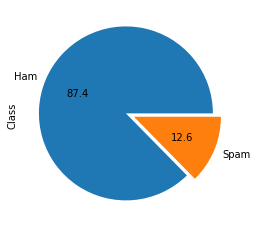

In [16]:
# Checking the distribution of our target class

data['Class'].value_counts().plot(kind = 'pie', autopct="%0.1f", labels = ['Ham', 'Spam'], explode = [0.05,0.05])

> Our data is highly biased towards Ham classes, it is imbalanced.

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def cols(df):
    df['Sent_Length'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
    df['Word_length'] =df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
cols(data)

In [21]:
data.head()

,Class,Text,Sent_Length,Word_length
0,0,"Go until jurong point, crazy.. Available only ...",2,24
1,0,Ok lar... Joking wif u oni...,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37
3,0,U dun say so early hor... U c already then say...,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15


In [22]:
# Ham Classes
data[data['Class']==0][['Sent_Length','Word_length']].describe()

,Sent_Length,Word_length
count,4516.000000,4516.000000
mean,1.815545,17.123339
std,1.364098,13.491315
min,1.000000,1.000000
25%,1.000000,8.000000
50%,1.000000,13.000000
75%,2.000000,22.000000
max,38.000000,220.000000


In [23]:
# Spam Classes
data[data['Class']==1][['Sent_Length','Word_length']].describe()

,Sent_Length,Word_length
count,653.000000,653.000000
mean,2.969372,27.667688
std,1.488910,7.008418
min,1.000000,2.000000
25%,2.000000,25.000000
50%,3.000000,29.000000
75%,4.000000,32.000000
max,9.000000,46.000000


<AxesSubplot:xlabel='Word_length', ylabel='Count'>

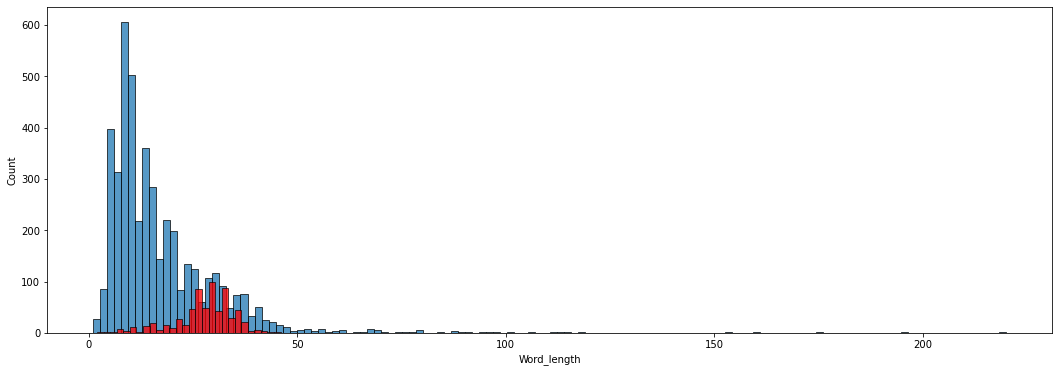

In [24]:
plt.figure(figsize = (18,6))
sns.histplot(data[data['Class']==0]['Word_length'])
sns.histplot(data[data['Class']==1]['Word_length'], color = 'red')

> In General Spam text contain around 25-40 words on average.
> Ham text are densed mostly between 2-30 words.

In [25]:
from wordcloud import WordCloud, STOPWORDS

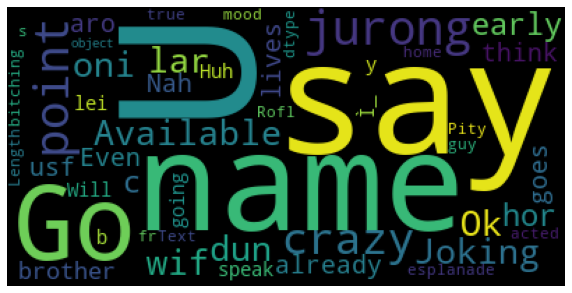

In [26]:
## Analyzing the content of "Text" proided.

stopwords= set(STOPWORDS)
def cloud(data):
    wordcloud = WordCloud(
    stopwords = stopwords,
    max_words =150,
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
cloud(data[data['Class']==0]['Text'])

> Most commonly words used in Ham messages

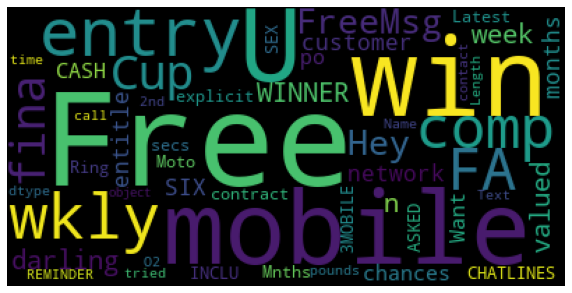

In [27]:
cloud(data[data['Class']==1]['Text'])

> Most commonly words used in Spam messages

## Data Preprocessing

* Converting all characters into lower case.
* Word tokenization.
* Selecting words which only are alpha-numeric.
* Removing stopwords.
* Removing punctuation.
* Lemmatization.

In [28]:
  import nltk
  stopwords = nltk.corpus.stopwords.words('english')


In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
def reform(sentance):
    text = sentance.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    new = []
    for i in y:
        if i not in stopwords and i not in string.punctuation:
            new.append(i)
    final = []
    for i in new:
        final.append(lemmatizer.lemmatize(i))
    return " ".join(final)

In [34]:
reform('I loved the You lie by Eminem, did you like this song ?? 123 @@@ ')

'loved lie eminem like song 123'

In [35]:
data['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [36]:
data['new_text'] = data['Text'].apply(reform)

In [37]:
data.head()

,Class,Text,Sent_Length,Word_length,new_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,2,8,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,1,13,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,nah think go usf life around though


In [38]:
## Displaying top 20 most frequent words from spam and ham classes

In [39]:
data.rename(columns = {'new_text': 'Transformed_text'}, inplace = True)
data.head()

,Class,Text,Sent_Length,Word_length,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,2,8,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,1,13,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,nah think go usf life around though


In [40]:
corpus = []
for i in data[data['Class']==1]['Transformed_text']:
    for j in i.split(" "):
        corpus.append(j)

In [41]:
from collections import Counter


<AxesSubplot:xlabel='0', ylabel='1'>

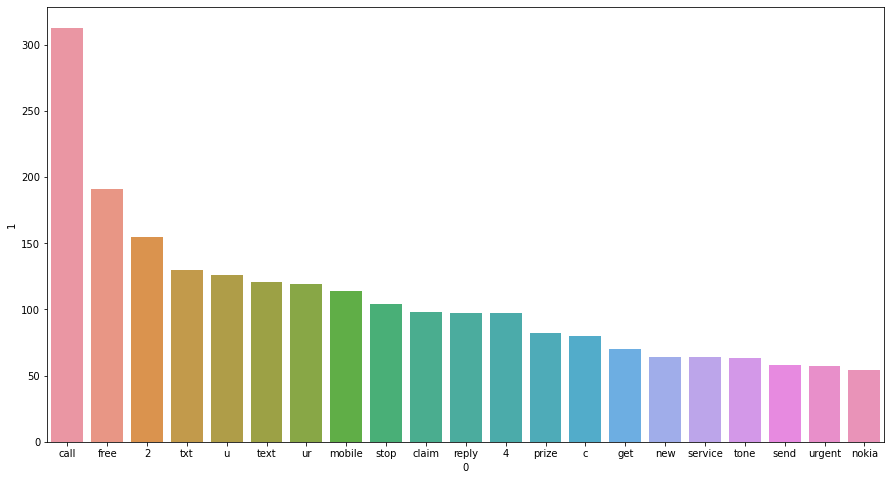

In [42]:
plt.figure(figsize = (15,8))
sns.barplot(pd.DataFrame(Counter(corpus).most_common(21))[0],pd.DataFrame(Counter(corpus).most_common(21))[1])    

> These ar the top 20 most frequent spam words used.

## Model Building

In [43]:
X = data['Transformed_text']
Y = data['Class']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 25)

### TFIDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
features = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

In [46]:
X_train_features = features.fit_transform(X_train).toarray()
X_test_features = features.transform(X_test).toarray()

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

## Naive Bayes

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train_features, Y_train)
Y_pred = gnb.predict(X_test_features)

print(accuracy_score(Y_test,Y_pred))
print()
print(confusion_matrix(Y_test,Y_pred))
print()
print(precision_score(Y_test,Y_pred))

0.874274661508704

[[785 109]
 [ 21 119]]

0.5219298245614035


In [50]:
mnb.fit(X_train_features, Y_train)
Y_pred2 = mnb.predict(X_test_features)

print(accuracy_score(Y_test,Y_pred2))
print()
print(confusion_matrix(Y_test,Y_pred2))
print()
print(precision_score(Y_test,Y_pred2))

0.9516441005802708

[[894   0]
 [ 50  90]]

1.0


In [51]:
bnb.fit(X_train_features, Y_train)
Y_pred3 = bnb.predict(X_test_features)

print(accuracy_score(Y_test,Y_pred3))
print()
print(confusion_matrix(Y_test,Y_pred3))
print()
print(precision_score(Y_test,Y_pred3))

0.9622823984526112

[[894   0]
 [ 39 101]]

1.0


In [54]:
## Comparision

Models_nb = pd.DataFrame({'Models':['GaussianNB', 'MultinomialNB','BernoulliNB'], 'Accuracy': [accuracy_score(Y_test,Y_pred)*100,accuracy_score(Y_test,Y_pred2)*100,accuracy_score(Y_test,Y_pred3)*100]})

<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

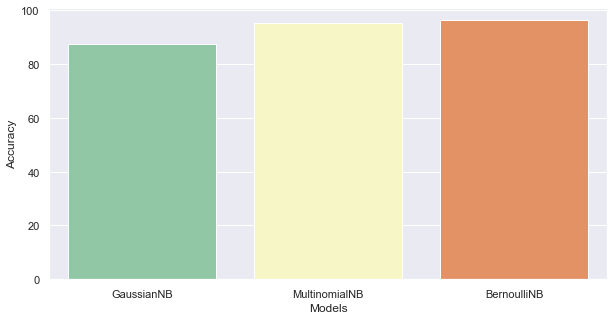

In [55]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(Models_nb['Models'], Models['Accuracy'],palette="Spectral_r")

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

In [50]:
rf.fit(X_train_features, Y_train)
Y_pred4 = rf.predict(X_test_features)

print(accuracy_score(Y_test,Y_pred4))
print()
print(confusion_matrix(Y_test,Y_pred4))
print()
print(precision_score(Y_test,Y_pred4))

0.8646034816247582

[[894   0]
 [140   0]]

0.0


<AxesSubplot:>

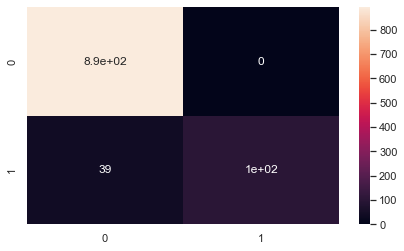

In [58]:

plt.figure(figsize =(7,4))
cm = confusion_matrix(Y_test,Y_pred3)

sns.heatmap(cm, annot = True)

## Balancing the data

In [59]:
X_features = features.fit_transform(X)

In [60]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =23)
X_sm , y_sm = sm.fit_resample(X_features,Y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_sm , y_sm, test_size = 0.20, random_state = 42)

In [62]:
bnb1 = BernoulliNB()

In [63]:
bnb1.fit(X_train, y_train)
Y_pred4 = bnb1.predict(X_test)

print(accuracy_score(y_test,Y_pred4))
print()
print(confusion_matrix(y_test,Y_pred4))
print()
print(precision_score(y_test,Y_pred4))

0.9922523519645822

[[882   2]
 [ 12 911]]

0.9978094194961665


In [64]:
from sklearn.metrics import f1_score,classification_report

In [65]:
print(classification_report(y_test,Y_pred4))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       884
           1       1.00      0.99      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



In [68]:
## Comparision

Models_nb_2 = pd.DataFrame({'Model':['BernoulliNB'], 'Accuracy': [accuracy_score(y_test,Y_pred4)*100]})

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

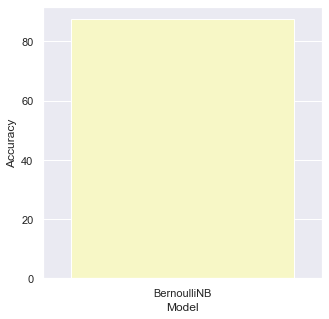

In [74]:
plt.figure(figsize=(5,5))
sns.set()
sns.barplot(Models_nb_2['Model'], Models['Accuracy'],palette="Spectral")

<AxesSubplot:>

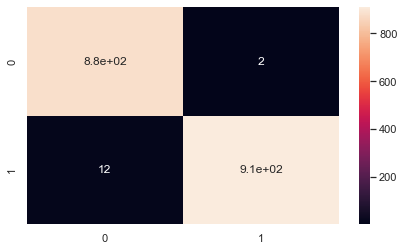

In [66]:
# Confusion matrics on DT

plt.figure(figsize =(7,4))
cm = confusion_matrix(y_test,Y_pred4)

sns.heatmap(cm, annot = True)

## Now after balancing the model is performing much better.

In [60]:
inp = ['free 200 gift card enroll in the contest and win amazing prices at home']

input_data = features.transform(inp)

prediction = bnb1.predict(input_data)
print(prediction)

[1]


In [61]:
import pickle

pickle.dump(features, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb1, open('model.pkl', 'wb'))